## Scikit-learn

### Installation

In [1]:
!pip install -U scikit-learn

### Imports

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

In [2]:
print("Numpy", np.__version__)
print("Scikit-learn", sk.__version__)

Numpy 1.17.3
Scikit-learn 0.24.1


### Datasets
*As we have said, machine learning methods rely on previous experience, usually
represented by a dataset.
* Scikit-learn includes a few well-known datasets.

In [3]:
from sklearn import datasets

> Listing all available datasets insklearn datasets

In [5]:
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [4]:
iris = datasets.load_iris()
iris.data[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [6]:
print(iris.data.shape)

(150, 4)


In [7]:
print(iris.target[:4])

[0 0 0 0]


In [8]:
X_iris, y_iris = iris.data, iris.target

**data**
 * array, where, for each instance, we have the real values for:
        * sepal length
        * sepal width
        * petal length
        * petal width **respectively**
   
   
The shape of this array is `*(150, 4)*`, meaning that we have 150 rows (one for each instance) and four columns (one for each feature).
* A target array, with values in the range of 0 to 2, corresponding to each instance of Iris species `(0: setosa, 1: versicolor, and 2: virginica)`, as you can verify by printing the `iris.target_names`

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Linear Classification
* To get a grip on the problem of machine learning in scikit-learn, we will start with a
very simple machine learning problem: we will try to predict the Iris flower species
using only two attributes: sepal width and sepal length. This is an instance of a
classification problem, where we want to assign a label (a value taken from a discrete
set) to an item according to its features.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [11]:
X_iris[:, :2][:5] # takes the sepal length and width

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [12]:
X, y = X_iris[:,:2], y_iris

In [13]:
X[:2]

array([[5.1, 3.5],
       [4.9, 3. ]])

In [14]:
y[:3]

array([0, 0, 0])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [16]:
X_train[:2]

array([[5. , 2.3],
       [4.9, 3.1]])

In [17]:
print(y_train.shape)

(112,)


* The idea behind **StandardScaler** is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. In case of multivariate data, this is done feature-wise (in other words independently for each column of the data)
> Standadised Normal Distribution has (mean =0, std =1) - Dr Ruffin

In [18]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [19]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
X_train[:2]

array([[-0.91090798, -1.59775374],
       [-1.0271058 ,  0.08448757]])

### What is going on
1. The train_test_split function automatically builds the training and evaluation
datasets, randomly selecting the samples. 
2. The last three lines of the previous code modify the training set in a process usually
called feature scaling. For each feature, calculate the average, subtract the mean
value from the feature value, and divide the result by their standard deviation. After
scaling, each feature will have a zero average, with a standard deviation of one.

In [21]:
import seaborn as sns

In [22]:
colors = ["red", "green", "blue"]

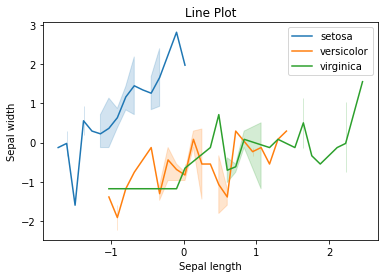

In [23]:
for i in range(len(colors)):
    xs = X_train[:,0][y_train== i]
    ys = X_train[:, 1][y_train == i]
    sns.lineplot(x=xs, y=ys)
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.title("Line Plot")
plt.ylabel('Sepal width')
plt.show()

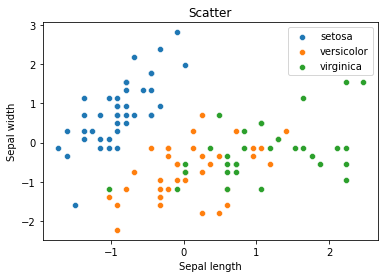

In [24]:
for i in range(len(colors)):
    xs = X_train[:,0][y_train== i]
    ys = X_train[:, 1][y_train == i]
    sns.scatterplot(x=xs, y=ys)
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.title("Scatter")
plt.ylabel('Sepal width')
plt.show()

* To implement linear classification, we will use the SGDClassifier from scikit-learn. **SGD** stands for **Stochastic Gradient Descent**, a very popular numerical procedure
to find the local minimum of a function (in this case, the loss function, which
measures how far every instance is from our boundary). The algorithm will learn the
coefficients of the hyperplane by minimizing the loss function.

In [25]:
from sklearn.linear_model import SGDClassifier

In [26]:
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [27]:
clf.coef_

array([[-2.62090575e+01,  1.24381316e+01],
       [-2.12078533e-01, -5.37310145e+00],
       [ 9.32739591e+00, -8.35515664e-14]])

In [28]:
clf.intercept_

array([-18.22010578,  -3.0202139 ,  -5.4343458 ])

### Making predictions
* Now, the end of the story: suppose that we have a new flower with a sepal width of 4.7 and a sepal length of 3.1, and we want to predict its class.

In [29]:
scaled_data = scaler.transform([[4.7, 3.1]])
scaled_data

array([[-1.25950146,  0.08448757]])

In [30]:
clf.predict(scaled_data)

array([0])

In [31]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [32]:
iris.target_names[clf.predict(scaled_data)][0]

'setosa'

In [33]:
# Predict on the existing data
print(iris.data[0], iris.target_names[0], iris.target[0])

[5.1 3.5 1.4 0.2] setosa 0


In [34]:
scaled_data = scaler.transform([[5.1 ,3.5]])
clf.predict(scaled_data)

array([0])

In [35]:
clf.decision_function(scaler.transform([[4.7, 3.1]]))

array([[ 15.84110782,  -3.20706094, -17.18221458]])

###  Evaluating our results
* We want to be a little more formal when we talk about a good classifier. What does
that mean? The performance of a classifier is a measure of its effectiveness. The
simplest performance measure is accuracy: given a classifier and an evaluation
dataset, it measures the proportion of instances correctly classified by the classifier.
First, let's test the accuracy on the training set:

In [36]:
from sklearn.metrics import accuracy_score
y_train_pred = clf.predict(X_train)

acc = accuracy_score(y_train, y_train_pred)
acc

0.8482142857142857

In [37]:
y_predict = clf.predict(X_test)
acc = accuracy_score(y_test, y_predict)
acc

0.6578947368421053

>We obtained an accuracy of 68 percent in our testing set. Usually, accuracy on the
testing set is lower than the accuracy on the training set, since the model is actually
modeling the training set, not the testing set.

> Computing precision

In [39]:
from sklearn.metrics import classification_report

In [44]:
y_test, y_predict, iris.target_names

(array([1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0,
        2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1]),
 array([1, 2, 0, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 0,
        2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1]),
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [46]:
report = classification_report(y_test, y_predict, target_names = iris.target_names)

In [52]:
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.42      0.45      0.43        11
   virginica       0.67      0.63      0.65        19

    accuracy                           0.66        38
   macro avg       0.69      0.70      0.69        38
weighted avg       0.66      0.66      0.66        38



* The classifier obtained 1.0 precision and recall in the setosa class. This
means that for precision, 100 percent of the instances that are classified as
setosa are really setosa instances, and for recall, that 100 percent of the setosa
instances were classified as setosa.
* On the other hand, in the versicolor class, the results are not as good:
we have a precision of 0.43, that is, only 43 percent of the instances that are
classified as versicolor are really versicolor instances. Also, for versicolor, we
have a recall of 0.27, that is, only 27 percent of the versicolor instances are
correctly classified.

#### Cross Validation
* To finish our evaluation process, we will introduce a very useful method known
as cross-validation. As we explained before, we have to partition our dataset into
a training set and a testing set. However, partitioning the data, results such that
there are fewer instances to train on, and also, depending on the particular partition
we make (usually made randomly), we can get either better or worse results.
Cross-validation allows us to avoid this particular case, reducing result variance and
producing a more realistic score for our models

In [59]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [60]:
 # create a composite estimator made by a pipeline of the standarization and the linear model

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_model", SGDClassifier())
])

In [65]:
# create a k-fold cross validation iterator of k=5 folds
cv = KFold(n_splits=5, shuffle=True, random_state=33)
# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(clf, X, y, cv=cv)

In [66]:
scores

array([0.7       , 0.76666667, 0.76666667, 0.86666667, 0.6       ])

> We obtained an array with the k scores. We can calculate the mean and the standard
error to obtain a final figure:

In [67]:
from scipy.stats import sem

In [68]:
print("Mean score: ", np.mean(scores), "(+/-", sem(scores), ")")

Mean score:  0.74 (+/- 0.04396968652757641 )


> Our model is 0.74 accuracy

## Machine learning categories
Classification is only one of the possible machine learning problems that can be
addressed with scikit-learn.


> In the previous example, we had a set of instances (that is, a set of data
collected from a population) represented by certain features and with a
particular target attribute. **Supervised learning** algorithms try to build a
model from this data, which lets us predict the target attribute for new
instances, knowing only these instance features. When the target class
belongs to a discrete set (such as a list of flower species), we are facing a
classification problem.

> Sometimes the class we want to predict, instead of belonging to a discrete
set, ranges on a continuous set, such as the real number line. In this case, we
are trying to solve a **regression** problem (the term was coined by Francis
Galton, who observed that the heights of tall ancestors tend to regress down
towards a normal value, the average human height). For example, we could
try to predict the petal width based on the other three features. We will see
that the methods used for regression are quite different from those used for
classification.

>Another different type of machine learning problem is that of **unsupervised
learning**. In this case, we do not have a target class to predict but instead
want to group instances according to some similarity measure based on the
available set of features. For example, suppose you have a dataset composed
of e-mails and want to group them by their main topic (the task of grouping
instances is called **clustering**). We can use it as features, for example, the
different words used in each of them.

However, we should also take into account Einstein's words:

"_Everything should be made as simple as possible, but not simpler._"
